In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import gmaps
import sys
import os
import json

In [2]:
crime_data_file = pd.read_csv('resources/crimedata.csv')
df = pd.DataFrame(crime_data_file)
df

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,UOR_DESC,CRIME_TYPE,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,CITY,ZIP_CODE,ID
0,0,80-16-111411,2017-01-01 08:24:55,2016-12-30 21:00:00,TBUT OR DISP ALL OTHERS < $500,THEFT/LARCENY,23H,PART I,COMPLETED,2ND DIVISION,223,HIGHWAY / ROAD / ALLEY,1600 BLOCK DUMESNIL ST ...,LOUISVILLE,40210,1062371
1,1,80-17-000033,2017-01-01 05:20:56,2016-12-31 18:30:00,TBUT OR DISP CONTENTS FROM VEH < $500,VEHICLE BREAK-IN/THEFT,23F,PART I,COMPLETED,3RD DIVISION,331,PARKING LOT / GARAGE,4500 BLOCK GREENWOOD RD ...,LOUISVILLE,40258,1062381
2,2,80-17-000025,2017-01-01 00:57:00,2017-01-01 00:30:00,ASSAULT - 4TH DEGREE (MINOR INJURY),ASSAULT,13B,PART II,COMPLETED,7TH DIVISION,736,HOTEL / MOTEL / ETC.,6500 BLOCK SIGNATURE DR ...,LOUISVILLE,40213,1062384
3,3,80-17-000005,2017-01-01 00:20:00,2017-01-01 00:01:00,CRIMINAL MISCHIEF-3RD DEGREE,VANDALISM,290,PART II,COMPLETED,1ST DIVISION,123,PARKING LOT / GARAGE,500 BLOCK S 5TH ST ...,LOUISVILLE,40202,1062385
4,4,80-17-000037,2017-01-01 00:35:00,2017-01-01 00:15:00,CRIMINAL MISCHIEF-3RD DEGREE,VANDALISM,290,PART II,COMPLETED,7TH DIVISION,735,RESIDENCE / HOME,6100 BLOCK OVERHILL DR ...,LOUISVILLE,40229,1062386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397160,77122,80-13-072813,2013-09-23 14:01:00,2013-09-18 14:01:00,RAPE - 1ST DEGREE,SEX CRIMES,11A,PART I,COMPLETED,4TH DIVISION,423,RESIDENCE / HOME,3700 BLOCK LENTZ AVE ...,LOUISVILLE,40215,1217471
397161,77123,80-13-027653,2013-04-19 23:32:00,2013-04-19 15:00:00,RAPE - 1ST DEGREE,SEX CRIMES,11A,PART I,COMPLETED,1ST DIVISION,111,OTHER / UNKNOWN,PARK - PORTLAND WHARF PARK ...,LOUISVILLE,40212,1238339
397162,77124,80-13-016472,2013-03-08 14:13:00,2013-01-01 00:00:00,RAPE - 1ST DEGREE,SEX CRIMES,11A,PART I,COMPLETED,METRO LOUISVILLE,METRO,RESIDENCE / HOME,COMMUNITY AT LARGE,LOUISVILLE,NaN,1238340
397163,77125,80-13-090856,2013-11-25 17:00:00,2013-11-25 07:50:00,RECEIVING STOLEN PROPERTY (FIREARM),THEFT/LARCENY,280,PART II,COMPLETED,5TH DIVISION,514,RESIDENCE / HOME,2700 BLOCK ALANMEDE RD ...,LOUISVILLE,40205,1242262


In [3]:
narrowed_df = df[['DATE_REPORTED', 'DATE_OCCURED', 'CRIME_TYPE', 'PREMISE_TYPE', 'ZIP_CODE']]
narrowed_df

,DATE_REPORTED,DATE_OCCURED,CRIME_TYPE,PREMISE_TYPE,ZIP_CODE
0,2017-01-01 08:24:55,2016-12-30 21:00:00,THEFT/LARCENY,HIGHWAY / ROAD / ALLEY,40210
1,2017-01-01 05:20:56,2016-12-31 18:30:00,VEHICLE BREAK-IN/THEFT,PARKING LOT / GARAGE,40258
2,2017-01-01 00:57:00,2017-01-01 00:30:00,ASSAULT,HOTEL / MOTEL / ETC.,40213
3,2017-01-01 00:20:00,2017-01-01 00:01:00,VANDALISM,PARKING LOT / GARAGE,40202
4,2017-01-01 00:35:00,2017-01-01 00:15:00,VANDALISM,RESIDENCE / HOME,40229
...,...,...,...,...,...
397160,2013-09-23 14:01:00,2013-09-18 14:01:00,SEX CRIMES,RESIDENCE / HOME,40215
397161,2013-04-19 23:32:00,2013-04-19 15:00:00,SEX CRIMES,OTHER / UNKNOWN,40212
397162,2013-03-08 14:13:00,2013-01-01 00:00:00,SEX CRIMES,RESIDENCE / HOME,NaN
397163,2013-11-25 17:00:00,2013-11-25 07:50:00,THEFT/LARCENY,RESIDENCE / HOME,40205


In [4]:
data = narrowed_df.rename(columns={"DATE_REPORTED": "Date Reported", "DATE_OCCURED": "Date Occurred",
                                  "CRIME_TYPE": "Crime Type", "PREMISE_TYPE": "Premise Type",
                                  "ZIP_CODE": "Zip Code"})

data

,Date Reported,Date Occurred,Crime Type,Premise Type,Zip Code
0,2017-01-01 08:24:55,2016-12-30 21:00:00,THEFT/LARCENY,HIGHWAY / ROAD / ALLEY,40210
1,2017-01-01 05:20:56,2016-12-31 18:30:00,VEHICLE BREAK-IN/THEFT,PARKING LOT / GARAGE,40258
2,2017-01-01 00:57:00,2017-01-01 00:30:00,ASSAULT,HOTEL / MOTEL / ETC.,40213
3,2017-01-01 00:20:00,2017-01-01 00:01:00,VANDALISM,PARKING LOT / GARAGE,40202
4,2017-01-01 00:35:00,2017-01-01 00:15:00,VANDALISM,RESIDENCE / HOME,40229
...,...,...,...,...,...
397160,2013-09-23 14:01:00,2013-09-18 14:01:00,SEX CRIMES,RESIDENCE / HOME,40215
397161,2013-04-19 23:32:00,2013-04-19 15:00:00,SEX CRIMES,OTHER / UNKNOWN,40212
397162,2013-03-08 14:13:00,2013-01-01 00:00:00,SEX CRIMES,RESIDENCE / HOME,NaN
397163,2013-11-25 17:00:00,2013-11-25 07:50:00,THEFT/LARCENY,RESIDENCE / HOME,40205


In [5]:
# start stop and step variables
start, stop, step = 0, -15, 1

# converting to string data type 
data["Date Occurred"]= data["Date Occurred"].astype(str) 

# slicing till year element 
data["Year"]= data["Date Occurred"].str.slice(start, stop, step) 

# display 
data

,Date Reported,Date Occurred,Crime Type,Premise Type,Zip Code,Year
0,2017-01-01 08:24:55,2016-12-30 21:00:00,THEFT/LARCENY,HIGHWAY / ROAD / ALLEY,40210,2016
1,2017-01-01 05:20:56,2016-12-31 18:30:00,VEHICLE BREAK-IN/THEFT,PARKING LOT / GARAGE,40258,2016
2,2017-01-01 00:57:00,2017-01-01 00:30:00,ASSAULT,HOTEL / MOTEL / ETC.,40213,2017
3,2017-01-01 00:20:00,2017-01-01 00:01:00,VANDALISM,PARKING LOT / GARAGE,40202,2017
4,2017-01-01 00:35:00,2017-01-01 00:15:00,VANDALISM,RESIDENCE / HOME,40229,2017
...,...,...,...,...,...,...
397160,2013-09-23 14:01:00,2013-09-18 14:01:00,SEX CRIMES,RESIDENCE / HOME,40215,2013
397161,2013-04-19 23:32:00,2013-04-19 15:00:00,SEX CRIMES,OTHER / UNKNOWN,40212,2013
397162,2013-03-08 14:13:00,2013-01-01 00:00:00,SEX CRIMES,RESIDENCE / HOME,NaN,2013
397163,2013-11-25 17:00:00,2013-11-25 07:50:00,THEFT/LARCENY,RESIDENCE / HOME,40205,2013


In [6]:
# rate of crime per year
date_crime=data[["Year","Date Occurred"]]
date_crime=date_crime.groupby(["Year"]).count().reset_index()
num_crime=date_crime["Date Occurred"]
sum_crime=date_crime["Date Occurred"].sum()
rate_crime=num_crime/sum_crime
date_crime["rate_crime"]=rate_crime
date_crime=date_crime.rename(columns={"Date Occurred":"num_crime"})
date_crime

,Year,num_crime,rate_crime
0,2013,76888,0.193592
1,2014,77271,0.194556
2,2015,79434,0.200003
3,2016,83436,0.210079
4,2017,80136,0.201770


In [7]:
date_crime.describe()



,num_crime,rate_crime
count,5.000000,5.000000
mean,79433.000000,0.200000
std,2630.089732,0.006622
min,76888.000000,0.193592
25%,77271.000000,0.194556
50%,79434.000000,0.200003
75%,80136.000000,0.201770
max,83436.000000,0.210079


In [8]:
crime_type =data['Crime Type'].value_counts()
crime_type

THEFT/LARCENY               78459
DRUGS/ALCOHOL VIOLATIONS    72048
ASSAULT                     65675
OTHER                       39039
BURGLARY                    31718
VANDALISM                   28404
VEHICLE BREAK-IN/THEFT      27552
FRAUD                       19342
MOTOR VEHICLE THEFT         16359
ROBBERY                      7607
WEAPONS                      5680
DISTURBING THE PEACE         2433
SEX CRIMES                   2341
HOMICIDE                      437
ARSON                          42
DUI                            29
Name: Crime Type, dtype: int64

In [9]:
premise_type =data['Premise Type'].value_counts()
premise_type

RESIDENCE / HOME                      143164
HIGHWAY / ROAD / ALLEY                 83085
PARKING LOT / GARAGE                   31660
OTHER RESIDENCE (APARTMENT/CONDO)      27062
DEPARTMENT / DISCOUNT STORE            22180
OTHER / UNKNOWN                        17818
GROCERY / SUPERMARKET                   8161
RESTAURANT                              5604
CONVENIENCE STORE                       5555
SERVICE / GAS STATION                   5432
SPECIALTY STORE (TV, FUR, ETC)          4645
DRUG STORE/DR`S OFFICE/HOSPITAL         4641
COMMERCIAL / OFFICE BUILDING            4592
HOTEL / MOTEL / ETC.                    4116
NON-ATTACHED RESD GARAGE/SHED/BULD      3440
SCHOOL - ELEMENTARY / SECONDARY         3222
PARK / PLAYGROUND                       3182
BAR / NIGHT CLUB                        2708
BANK / SAVINGS & LOAN                   2101
GOVERNMENT / PUBLIC BUILDING            1774
CHURCH / SYNAGOGUE / TEMPLE             1390
CONSTRUCTION SITE                       1296
AUTO DEALE

In [10]:
link_crime_bites= data.groupby(["Crime Type","Premise Type"]).count()
link_crime_bites=link_crime_bites.sort_values(["Year"], ascending= False).reset_index()
link_crime_bites.head(20)

,Crime Type,Premise Type,Date Reported,Date Occurred,Zip Code,Year
0,DRUGS/ALCOHOL VIOLATIONS,HIGHWAY / ROAD / ALLEY,45786,45786,44994,45786
1,ASSAULT,RESIDENCE / HOME,36207,36207,36177,36207
2,OTHER,RESIDENCE / HOME,23930,23930,23861,23930
3,THEFT/LARCENY,RESIDENCE / HOME,19817,19817,19805,19817
4,BURGLARY,RESIDENCE / HOME,19807,19807,19802,19807
5,THEFT/LARCENY,DEPARTMENT / DISCOUNT STORE,16918,16918,16893,16918
6,VANDALISM,RESIDENCE / HOME,12000,12000,11996,12000
7,VEHICLE BREAK-IN/THEFT,PARKING LOT / GARAGE,10654,10654,10649,10654
8,DRUGS/ALCOHOL VIOLATIONS,RESIDENCE / HOME,10637,10637,10570,10637
9,ASSAULT,OTHER RESIDENCE (APARTMENT/CONDO),9111,9111,9102,9111


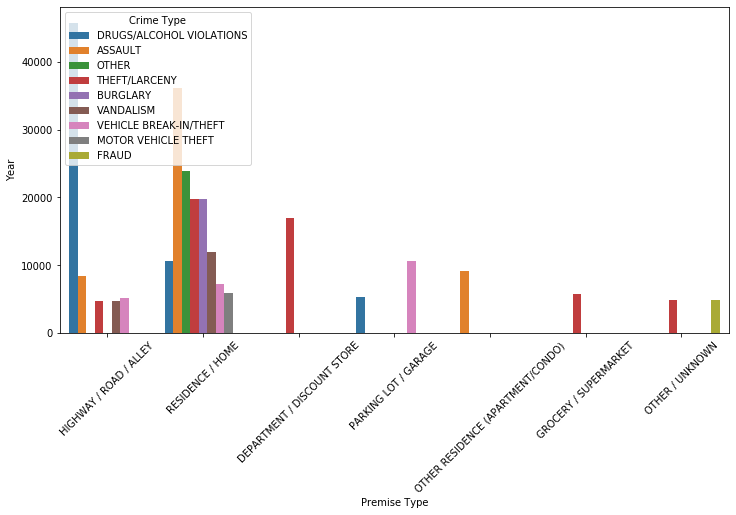

In [11]:

data=link_crime_bites.head(20)
plt.figure(figsize=(12,6))
sns.barplot(x = "Premise Type", y = "Year", hue = "Crime Type", data = data)
plt.xticks(rotation=45)
plt.show()

In [12]:
#zip code with most crime cases
year_group = data.groupby("Zip Code").count()
tz= year_group.reset_index().sort_values(["Year"], ascending=False)
zip_crime= tz[["Zip Code","Year"]]
zip_crime.head(5)

,Zip Code,Year
0,4720,1
1,4750,1
18,36177,1
17,23861,1
16,19805,1


In [13]:
read_file= pd.read_csv("Resources/datasets_2515_4202_Health_AnimalBites.csv")
read_file.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


In [14]:
#converting to datatime to be able to extrect year, month, days, and hours 

#read_file["bite_convert_date "]= pd.to_datetime(read_file.iloc[:,0], errors="coerce")

#read_file
# start stop and step variables
start, stop, step = 0, -15, 1

# converting to string data type 
read_file["bite_date"]= read_file["bite_date"].astype(str) 

# slicing till year element 
read_file["Year"]=read_file["bite_date"].str.slice(start, stop, step) 

# display 
read_file

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc,Year
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN,1985
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN,1986
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN,1987
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN,1988
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN,1989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8998,2017-09-05 00:00:00,DOG,NaN,NaN,NaN,NaN,NaN,40243,NaN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,2017
8999,2017-09-07 00:00:00,DOG,POMERANIAN,MALE,RED,NaN,NaN,40204,NaN,HEAD,NaN,NaN,NaN,NaN,NaN,2017
9000,2017-09-07 00:00:00,DOG,LABRADOR RETRIV,MALE,BROWN,NaN,NaN,47130,NaN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,2017
9001,2017-09-07 00:00:00,DOG,LABRADOR RETRIV,FEMALE,BLK WHT,NaN,NaN,40229,NaN,BODY,NaN,NaN,NaN,NaN,NaN,2017


In [15]:
#anim_bites=pp[["Year/Month","species"]]
#anim_bites=anim_bites.groupby(["Year/Month"]).count().reset_index()
#num_b=anim_bites["species"]
#sum_b=anim_bites["species"].sum()
#rate_bites=num_b/sum_b
#anim_bites["bites_rate"]=rate_bites
#anim_bites.rename(columns={"species":"num_bites"})
#anim_bites=anim_bites.dropna()


In [16]:
lf= read_file.loc[(read_file.iloc[:,15]>= "2013") & (read_file.iloc[:,15] <= "2017")]
lf

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc,Year
1391,2013-03-01 00:00:00,DOG,NaN,MALE,BLK WHT,NaN,NaN,NaN,NaN,BODY,NaN,NaN,2013-03-08 00:00:00,NaN,NaN,2013
1392,2013-03-01 00:00:00,DOG,DALMATIAN,NaN,NaN,NaN,NaN,NaN,NaN,BODY,NaN,NaN,2013-03-08 00:00:00,NaN,NaN,2013
1393,2013-04-12 00:00:00,DOG,HUSKY,NaN,NaN,NaN,NaN,NaN,YES,BODY,NaN,NaN,2013-04-12 00:00:00,NaN,NEGATIVE,2013
1394,2013-08-07 00:00:00,DOG,BORDER COLLIE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-08-08 00:00:00,NaN,NEGATIVE,2013
1395,2013-08-15 00:00:00,CAT,NaN,NaN,ORGE WHITE,NaN,NaN,40214,NaN,BODY,NaN,NaN,2013-08-15 00:00:00,NaN,NaN,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8998,2017-09-05 00:00:00,DOG,NaN,NaN,NaN,NaN,NaN,40243,NaN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,2017
8999,2017-09-07 00:00:00,DOG,POMERANIAN,MALE,RED,NaN,NaN,40204,NaN,HEAD,NaN,NaN,NaN,NaN,NaN,2017
9000,2017-09-07 00:00:00,DOG,LABRADOR RETRIV,MALE,BROWN,NaN,NaN,47130,NaN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,2017
9001,2017-09-07 00:00:00,DOG,LABRADOR RETRIV,FEMALE,BLK WHT,NaN,NaN,40229,NaN,BODY,NaN,NaN,NaN,NaN,NaN,2017


In [17]:
#selecting the needed columns using the loc function
Animal_Bites_df=lf.iloc[:,[15,1,2,3,4,7]]
Animal_Bites_df

,Year,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,victim_zip
1391,2013,DOG,NaN,MALE,BLK WHT,NaN
1392,2013,DOG,DALMATIAN,NaN,NaN,NaN
1393,2013,DOG,HUSKY,NaN,NaN,NaN
1394,2013,DOG,BORDER COLLIE,NaN,NaN,NaN
1395,2013,CAT,NaN,NaN,ORGE WHITE,40214
...,...,...,...,...,...,...
8998,2017,DOG,NaN,NaN,NaN,40243
8999,2017,DOG,POMERANIAN,MALE,RED,40204
9000,2017,DOG,LABRADOR RETRIV,MALE,BROWN,47130
9001,2017,DOG,LABRADOR RETRIV,FEMALE,BLK WHT,40229


In [18]:
Animal_Bites_Table= Animal_Bites_df.rename(columns={"SpeciesIDDesc":"species","BreedIDDesc":"Breeds","GenderIDDesc":"Gender","victim_zip":"Zip Code"})
Animal_Bites_Table

,Year,species,Breeds,Gender,color,Zip Code
1391,2013,DOG,NaN,MALE,BLK WHT,NaN
1392,2013,DOG,DALMATIAN,NaN,NaN,NaN
1393,2013,DOG,HUSKY,NaN,NaN,NaN
1394,2013,DOG,BORDER COLLIE,NaN,NaN,NaN
1395,2013,CAT,NaN,NaN,ORGE WHITE,40214
...,...,...,...,...,...,...
8998,2017,DOG,NaN,NaN,NaN,40243
8999,2017,DOG,POMERANIAN,MALE,RED,40204
9000,2017,DOG,LABRADOR RETRIV,MALE,BROWN,47130
9001,2017,DOG,LABRADOR RETRIV,FEMALE,BLK WHT,40229


In [19]:
pt=Animal_Bites_Table.groupby(["Year"]).count().reset_index()
pt=pt[["Year","species"]]
number_b=pt["species"]
sum_b= pt["species"].sum()
rate_b=round(number_b/sum_b,3)
pt["bites rate"]=rate_b
pt=pt.rename(columns={"species":"bites_num"})
pt

,Year,bites_num,bites rate
0,2013,1133,0.222
1,2014,1155,0.226
2,2015,978,0.191
3,2016,1049,0.205
4,2017,793,0.155


In [20]:
pt.describe()

,bites_num,bites rate
count,5.000000,5.000000
mean,1021.600000,0.199800
std,145.872547,0.028683
min,793.000000,0.155000
25%,978.000000,0.191000
50%,1049.000000,0.205000
75%,1133.000000,0.222000
max,1155.000000,0.226000


In [21]:
data_test=Animal_Bites_Table["species"].value_counts()
species_df=pd.DataFrame(data_test)
species_df

,species
DOG,4142
CAT,887
BAT,55
RACCOON,13
HORSE,4
FERRET,4
OTHER,2
RABBIT,1


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


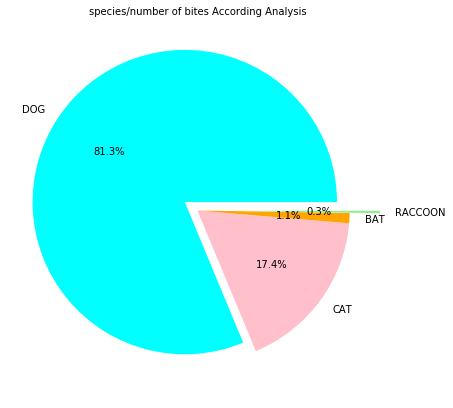

In [22]:
labels=species_df.head(4).index
colors=['cyan','pink','orange','lightgreen']
explode=[0.1,0,0,0.2]
values=species_df.head(4).values
#visualization
plt.figure(figsize=(7,7))
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('species/number of bites According Analysis',color='black',fontsize=10)
plt.show()

In [23]:
#accordintg to our Data we can say that dogs are more likely to bite human, they represent 81.3% of all cases follow by cats with 17.4%
#we also have negligeable cases like FERRET,RABBIT,SKUNK

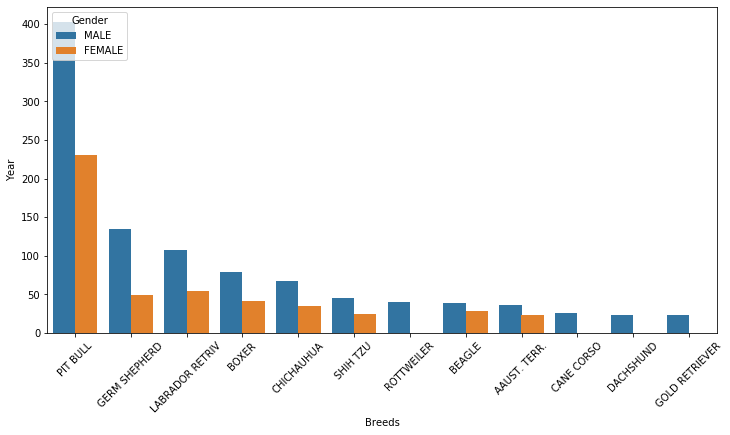

In [24]:
group_Breed_zip= Animal_Bites_Table.groupby(["Gender","Breeds"]).count().reset_index()
group_Breed_zip_sort= group_Breed_zip.sort_values(["Year"],ascending=False)

#bar chart with seaborn 
data=group_Breed_zip_sort.head(20)
plt.figure(figsize=(12,6))
sns.barplot(x = "Breeds", y = "Year", hue = "Gender", data = data)
plt.xticks(rotation=45)
plt.show()

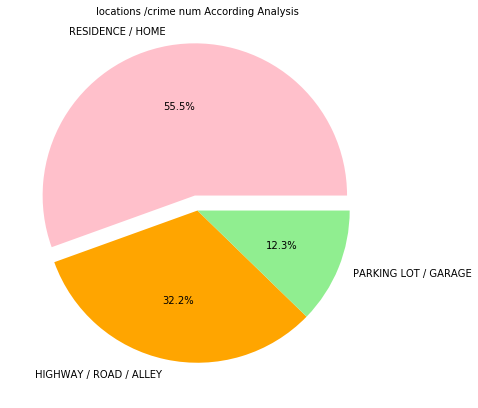

In [25]:
labels=premise_type.head(3).index
colors=['pink','orange','lightgreen']
explode=[0.1,0,0]
values=premise_type.head(3).values
#visualization
plt.figure(figsize=(7,7))
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('locations /crime num According Analysis',color='black',fontsize=10)
plt.show()

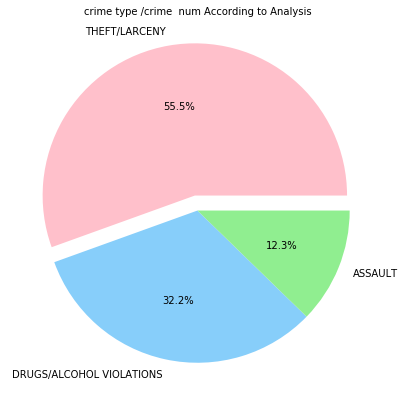

In [26]:
labels=crime_type.head(3).index
colors=['pink','lightskyblue','lightgreen']
explode=[0.1,0,0]
values=premise_type.head(3).values
#visualization
plt.figure(figsize=(7,7))
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('crime type /crime  num According to Analysis',color='black',fontsize=10)
plt.show()

In [27]:
#Animal_Bites_Table['month_year'] = pd.to_datetime(Animal_Bites_Table.iloc[:,0]).dt.to_period('M')
#Animal_Bites_Table.head()


In [28]:
#Animal_Bites_Table['year'] = pd.to_datetime(Animal_Bites_Table.iloc[:,0]).dt.year
#Animal_Bites_Table.


In [29]:
#find the area location with more bites
#grouping and sorting data 
Animal_Bites_grouped= Animal_Bites_Table.groupby(["Zip Code"])["species"].count().reset_index()
Animal_Bites_sort= Animal_Bites_grouped.sort_values(["species"], ascending=False)
#Find the Zipcode with the most bite by using the loc function 
most_bite_zip= Animal_Bites_sort.loc[Animal_Bites_sort["species"]==207]
#convert to a dataframe visualisation 
visual_mbz= pd.DataFrame(most_bite_zip)
visual_mbz_rename=visual_mbz.rename(columns={"species":"Number of Bites (max)"})
visual_mbz_rename.reset_index()


,index,Zip Code,Number of Bites (max)
0,98,40291,207


In [30]:

#amazing_you_are= beautiful_data[["Year Month reported","rate_Crime"]].rename(columns={"Year Month reported":"Year month data"})
#df= pd.DataFrame(amazing_you_are)
#df

In [31]:
#magnifique_groupby= Animal_Bites_Table.groupby(["Year month data"]).count()
#magnifique_groupby= magnifique_groupby.reset_index()
#num_bites= magnifique_groupby["Year data"]
#total_bites=magnifique_groupby["Year data"].sum()
#magnifique_groupby["rate_bites"]=round(num_bites/total_bites,3)
#magnifique_groupby=magnifique_groupby[["Year month data","rate_bites"]]
#lf=pd.DataFrame(magnifique_groupby)
#lf

Text(0.5, 0, 'Year Occured')

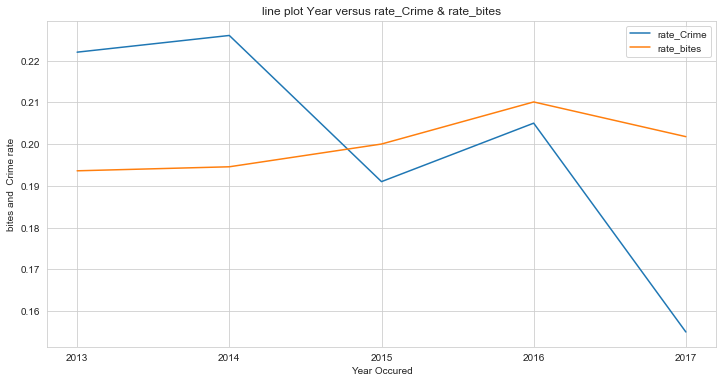

In [32]:
#generate a line plot to see the variation of both the crimes and bites rate from 2013 to 2017 in order to evaluate any similitude
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
ax=sns.lineplot(pt["Year"],pt["bites rate"], err_style=None, legend="brief", label='rate_Crime')
sns.lineplot(date_crime['Year'],date_crime['rate_crime'], err_style=None,legend="brief", label='rate_bites')
ax.set_title("line plot Year versus rate_Crime & rate_bites" )
ax.set_ylabel("bites and  Crime rate")
ax.set_xlabel("Year Occured")


In [33]:
#observation:
#the two lines vary differently 
# The rate of crime per year tends to be cyclical( umpredictable )
# the rate of bites per year  displays  a seasonal variation (easily predictable)
